# Customer Lifetime Value by RFM

In [1]:
# importing essential libraries
import pandas as pd
import numpy as np
import warnings
import xlrd
warnings.filterwarnings('ignore')
import csv

In [2]:
data= pd.read_csv('dataset_from_impala.csv ') 
data

,order_num,orderentry_num,productgroup,created_date,orderentry_revenue,user_id,customer_type,order_status,nettotalprice
0,180522-31324094,0,IM,5/22/2018,1074.000000,001cf,REGISTERED,COMPLETED,976.359985
1,180324-31208188,0,IM,3/24/2018,4871.750000,001gt,GUEST,COMPLETED,4428.859863
2,180324-31214305,0,IM,4/21/2018,4384.250000,001gt,GUEST,COMPLETED,3985.679932
3,180308-31159160,0,IM,3/9/2018,4438.120117,001gt,GUEST,COMPLETED,4034.649902
4,180308-31159160,1,IM,3/9/2018,433.630005,001gt,GUEST,COMPLETED,394.209992
...,...,...,...,...,...,...,...,...,...
31634,180302-31120691,1,IM,3/2/2018,85.879997,zulki,GUEST,COMPLETED,78.070000
31635,180308-31159073,1,IM,3/8/2018,1239.650024,zwizz,GUEST,COMPLETED,1126.949951
31636,180308-31159073,0,IM,3/8/2018,109.349998,zwizz,GUEST,COMPLETED,99.410004
31637,180510-31283695,0,IM,5/10/2018,1349.000000,zzil2,GUEST,COMPLETED,1226.359985


In [3]:
df2= pd.DataFrame(data)
df2.head(20)


,order_num,orderentry_num,productgroup,created_date,orderentry_revenue,user_id,customer_type,order_status,nettotalprice
0,180522-31324094,0,IM,5/22/2018,1074.000000,001cf,REGISTERED,COMPLETED,976.359985
1,180324-31208188,0,IM,3/24/2018,4871.750000,001gt,GUEST,COMPLETED,4428.859863
2,180324-31214305,0,IM,4/21/2018,4384.250000,001gt,GUEST,COMPLETED,3985.679932
3,180308-31159160,0,IM,3/9/2018,4438.120117,001gt,GUEST,COMPLETED,4034.649902
4,180308-31159160,1,IM,3/9/2018,433.630005,001gt,GUEST,COMPLETED,394.209992
5,180402-31223588,0,IM,4/3/2018,1074.000000,0021c,REGISTERED,COMPLETED,976.359985
6,180227-31100862,1,IM,2/27/2018,110.250000,002ef,REGISTERED,COMPLETED,100.230003
7,180227-31100862,0,IM,2/27/2018,1388.750000,002ef,REGISTERED,COMPLETED,1262.500000
8,180308-31147406,0,IM,3/8/2018,109.349998,3.00E+08,REGISTERED,COMPLETED,99.410004
9,180308-31147406,1,IM,3/8/2018,1239.650024,3.00E+08,REGISTERED,COMPLETED,1126.949951


In [4]:
dfwee=df2
dfwee

,order_num,orderentry_num,productgroup,created_date,orderentry_revenue,user_id,customer_type,order_status,nettotalprice
0,180522-31324094,0,IM,5/22/2018,1074.000000,001cf,REGISTERED,COMPLETED,976.359985
1,180324-31208188,0,IM,3/24/2018,4871.750000,001gt,GUEST,COMPLETED,4428.859863
2,180324-31214305,0,IM,4/21/2018,4384.250000,001gt,GUEST,COMPLETED,3985.679932
3,180308-31159160,0,IM,3/9/2018,4438.120117,001gt,GUEST,COMPLETED,4034.649902
4,180308-31159160,1,IM,3/9/2018,433.630005,001gt,GUEST,COMPLETED,394.209992
...,...,...,...,...,...,...,...,...,...
31634,180302-31120691,1,IM,3/2/2018,85.879997,zulki,GUEST,COMPLETED,78.070000
31635,180308-31159073,1,IM,3/8/2018,1239.650024,zwizz,GUEST,COMPLETED,1126.949951
31636,180308-31159073,0,IM,3/8/2018,109.349998,zwizz,GUEST,COMPLETED,99.410004
31637,180510-31283695,0,IM,5/10/2018,1349.000000,zzil2,GUEST,COMPLETED,1226.359985


In [5]:
#df2=df

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.
RECENCY (R): Days since last purchase. you have to subtract last purchase date from today's date. 
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent.
We will create those 3 customer attributes for each customer.

In [6]:
# finding maximum created date from each customer group
recency_df1 = df2.groupby(by='user_id', as_index=False)['created_date'].max()
recency_df1=recency_df1.rename(columns={'created_date':'max_created_date'})
recency_df1

,user_id,max_created_date
0,0.00E+00,5/19/2018
1,001cf,5/22/2018
2,001gt,4/21/2018
3,0021c,4/3/2018
4,002ef,2/27/2018
...,...,...
13297,ztale,5/10/2018
13298,zulfa,4/18/2018
13299,zulki,3/2/2018
13300,zwizz,3/8/2018


In [7]:
## finding minimum created date from each customer group
recency_df2 = df2.groupby(by='user_id', as_index=False)['created_date'].min()
recency_df2=recency_df2.rename(columns={'created_date':'min_created_date'})
recency_df2

,user_id,min_created_date
0,0.00E+00,1/2/2018
1,001cf,5/22/2018
2,001gt,3/24/2018
3,0021c,4/3/2018
4,002ef,2/27/2018
...,...,...
13297,ztale,5/10/2018
13298,zulfa,4/18/2018
13299,zulki,3/2/2018
13300,zwizz,3/8/2018


In [8]:
# combining the above 2 dataframes
recency_df3_first=recency_df1.merge(recency_df2, left_on='user_id', right_on='user_id', how='outer')
recency_df3_first

,user_id,max_created_date,min_created_date
0,0.00E+00,5/19/2018,1/2/2018
1,001cf,5/22/2018,5/22/2018
2,001gt,4/21/2018,3/24/2018
3,0021c,4/3/2018,4/3/2018
4,002ef,2/27/2018,2/27/2018
...,...,...,...
13297,ztale,5/10/2018,5/10/2018
13298,zulfa,4/18/2018,4/18/2018
13299,zulki,3/2/2018,3/2/2018
13300,zwizz,3/8/2018,3/8/2018


In [9]:
##df_new=df2[['user_id','productgroup']]
#df_new

In [10]:
#df_new1=df_new.drop_duplicates(subset=None, keep='first', inplace=False)
#df_new1

In [11]:
#recency_df3=recency_df3_first.merge(df_new1, left_on='user_id', right_on='user_id', how='outer')
#recency_df3

In [12]:
# this step is essential to change min_created_date and max_created_date to date format since the former 2 are strings, 
#couldn't useful to calculate difference between 2 dates
import pandas as pd
recency_df3_first['new_max_date'] = pd.DatetimeIndex(recency_df3_first['max_created_date']).date
recency_df3_first['new_min_date'] = pd.DatetimeIndex(recency_df3_first['min_created_date']).date
recency_df3_first

,user_id,max_created_date,min_created_date,new_max_date,new_min_date
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27
...,...,...,...,...,...
13297,ztale,5/10/2018,5/10/2018,2018-05-10,2018-05-10
13298,zulfa,4/18/2018,4/18/2018,2018-04-18,2018-04-18
13299,zulki,3/2/2018,3/2/2018,2018-03-02,2018-03-02
13300,zwizz,3/8/2018,3/8/2018,2018-03-08,2018-03-08


In [13]:
print(recency_df3_first.dtypes)

user_id             object
max_created_date    object
min_created_date    object
new_max_date        object
new_min_date        object
dtype: object


In [14]:
from datetime import date
dt=date.today()
print(dt)
recency_df3_first['Recency'] = recency_df3_first['new_max_date'].apply(lambda x: (dt - x).days)
recency_df3_first.head()

2025-01-10


,user_id,max_created_date,min_created_date,new_max_date,new_min_date,Recency
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2428
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2425
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2456
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2474
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2509


In [15]:
recency_df4=recency_df3_first
recency_df4

,user_id,max_created_date,min_created_date,new_max_date,new_min_date,Recency
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2428
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2425
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2456
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2474
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2509
...,...,...,...,...,...,...
13297,ztale,5/10/2018,5/10/2018,2018-05-10,2018-05-10,2437
13298,zulfa,4/18/2018,4/18/2018,2018-04-18,2018-04-18,2459
13299,zulki,3/2/2018,3/2/2018,2018-03-02,2018-03-02,2506
13300,zwizz,3/8/2018,3/8/2018,2018-03-08,2018-03-08,2500


In [16]:
import numpy as np
rfmTable1 = dfwee.groupby(['user_id']).agg({'order_num': lambda x: x.nunique(),# Frequency 
                                        'nettotalprice': lambda x: x.sum()}) # Monetary Value


In [17]:
rfmTable1

,order_num,nettotalprice
user_id,,
0.00E+00,3,3424.549969
001cf,1,976.359985
001gt,3,12843.399689
0021c,1,976.359985
002ef,1,1362.730003
...,...,...
ztale,1,472.000000
zulfa,1,599.500000
zulki,1,797.129997


In [18]:
rfmTable1=rfmTable1.rename(columns={'order_num':'Frequency', 'nettotalprice':'Monetary' })
rfmTable1

,Frequency,Monetary
user_id,,
0.00E+00,3,3424.549969
001cf,1,976.359985
001gt,3,12843.399689
0021c,1,976.359985
002ef,1,1362.730003
...,...,...
ztale,1,472.000000
zulfa,1,599.500000
zulki,1,797.129997


In [19]:
result = pd.merge(recency_df4, rfmTable1, how='outer', on=['user_id'])
result



,user_id,max_created_date,min_created_date,new_max_date,new_min_date,Recency,Frequency,Monetary
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2428,3,3424.549969
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2425,1,976.359985
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2456,3,12843.399689
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2474,1,976.359985
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2509,1,1362.730003
...,...,...,...,...,...,...,...,...
13297,ztale,5/10/2018,5/10/2018,2018-05-10,2018-05-10,2437,1,472.000000
13298,zulfa,4/18/2018,4/18/2018,2018-04-18,2018-04-18,2459,1,599.500000
13299,zulki,3/2/2018,3/2/2018,2018-03-02,2018-03-02,2506,1,797.129997
13300,zwizz,3/8/2018,3/8/2018,2018-03-08,2018-03-08,2500,1,1226.359955


In [20]:
result=result.rename(columns={'order_num':'Frequency', 'nettotalprice':'Monetary' })
result

,user_id,max_created_date,min_created_date,new_max_date,new_min_date,Recency,Frequency,Monetary
0,0.00E+00,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2428,3,3424.549969
1,001cf,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2425,1,976.359985
2,001gt,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2456,3,12843.399689
3,0021c,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2474,1,976.359985
4,002ef,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2509,1,1362.730003
...,...,...,...,...,...,...,...,...
13297,ztale,5/10/2018,5/10/2018,2018-05-10,2018-05-10,2437,1,472.000000
13298,zulfa,4/18/2018,4/18/2018,2018-04-18,2018-04-18,2459,1,599.500000
13299,zulki,3/2/2018,3/2/2018,2018-03-02,2018-03-02,2506,1,797.129997
13300,zwizz,3/8/2018,3/8/2018,2018-03-08,2018-03-08,2500,1,1226.359955


In [21]:
result.dtypes

user_id              object
max_created_date     object
min_created_date     object
new_max_date         object
new_min_date         object
Recency               int64
Frequency             int64
Monetary            float64
dtype: object

In [22]:
rfmTable_additional= result[['user_id','new_max_date','new_min_date']]
rfmTable_additional.drop_duplicates(subset=None, keep='first', inplace=False)

,user_id,new_max_date,new_min_date
0,0.00E+00,2018-05-19,2018-01-02
1,001cf,2018-05-22,2018-05-22
2,001gt,2018-04-21,2018-03-24
3,0021c,2018-04-03,2018-04-03
4,002ef,2018-02-27,2018-02-27
...,...,...,...
13297,ztale,2018-05-10,2018-05-10
13298,zulfa,2018-04-18,2018-04-18
13299,zulki,2018-03-02,2018-03-02
13300,zwizz,2018-03-08,2018-03-08


In [23]:
rfmTable = result[['user_id','Recency', 'Frequency','Monetary']]
#rfmTable
rfmTable.sort_values('Recency', ascending=True)

,user_id,Recency,Frequency,Monetary
8267,edisk,2386,1,981.090027
285,0d467,2386,1,2290.090088
8805,fai.t,2386,7,6016.880091
4619,9d67f,2386,1,1445.729988
2621,5adbb,2386,1,362.730011
...,...,...,...,...
3530,7941f,2566,1,252.680000
6280,brown,2566,1,1271.819946
2489,55bfb,2566,1,40.500000
2414,5341c,2566,1,72.600000


In [24]:

rfmTable.dtypes

user_id       object
Recency        int64
Frequency      int64
Monetary     float64
dtype: object

# Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use Quartiles. 
We assign a score from 1 to 4 to Recency, Frequency and Monetary. 
1 is the best/highest value, and 4 is the lowest/worst value.
A final RFM score is calculated simply by combining individual RFMClass numbers.
Note: Quantiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.



In statistics and the theory of probability, quantiles are cutpoints dividing the range of a probability distribution into contiguous intervals with equal probabilities, 
or dividing the observations in a sample in the same way. There are one fewer quantiles than the number of groups created. 
Thus quartiles are the three cut points that will divide a dataset into four equal-size groups.


In [25]:
#RFM Quartiles
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75], numeric_only=True)
quantiles

,Recency,Frequency,Monetary
0.25,2436.0,1.0,244.550003
0.50,2493.0,1.0,1090.000000
0.75,2505.0,1.0,1298.179985


In [26]:
quantiles.to_dict()

{'Recency': {0.25: 2436.0, 0.5: 2493.0, 0.75: 2505.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 244.5500031, 0.5: 1090.0, 0.75: 1298.17998469}}

# Definitions for customer segments:
1. Best Customers - Bought most recently and most often, and spend the most
2. Loyal Customers - Buy most frequently
3. Big Spenders - Spend the most
4. Recent Customers - Bought more recently
5. Almost Lost - Haven’t purchased for somewhat some time, but purchased some what frequently and spend the somewhat the most
6. Lost Customers - Haven’t purchased for some time, but purchased frequently and spend the most
7. Lost but low revenue generated Customers - Last purchased long ago, purchased few, and spent little
8. Others - The people who are not having the above scores will come to others category. This has to be filtered in Tableau


In [27]:
#extra
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [28]:
rfmSegmentation1=rfmTable
rfmSegmentation1['R_Quartile'] = rfmSegmentation1['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation1['F_Quartile'] = rfmSegmentation1['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation1['M_Quartile'] = rfmSegmentation1['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [29]:
rfmSegmentation1['RFMClass'] = rfmSegmentation1.R_Quartile.map(str) \
                            + rfmSegmentation1.F_Quartile.map(str) \
                            + rfmSegmentation1.M_Quartile.map(str)

In [30]:
rfmSegmentation1

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,0.00E+00,2428,3,3424.549969,1,1,1,111
1,001cf,2425,1,976.359985,1,4,3,143
2,001gt,2456,3,12843.399689,2,1,1,211
3,0021c,2474,1,976.359985,2,4,3,243
4,002ef,2509,1,1362.730003,4,4,1,441
...,...,...,...,...,...,...,...,...
13297,ztale,2437,1,472.000000,2,4,3,243
13298,zulfa,2459,1,599.500000,2,4,3,243
13299,zulki,2506,1,797.129997,4,4,3,443
13300,zwizz,2500,1,1226.359955,3,4,2,342


In [31]:
result_newt111 = pd.merge(rfmSegmentation1, result, how='outer', on=['user_id','Monetary'])
result_newt3=result_newt111.drop_duplicates()

In [32]:
result_newt3.drop_duplicates()

,user_id,Recency_x,Frequency_x,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,max_created_date,min_created_date,new_max_date,new_min_date,Recency_y,Frequency_y
0,0.00E+00,2428,3,3424.549969,1,1,1,111,5/19/2018,1/2/2018,2018-05-19,2018-01-02,2428,3
1,001cf,2425,1,976.359985,1,4,3,143,5/22/2018,5/22/2018,2018-05-22,2018-05-22,2425,1
2,001gt,2456,3,12843.399689,2,1,1,211,4/21/2018,3/24/2018,2018-04-21,2018-03-24,2456,3
3,0021c,2474,1,976.359985,2,4,3,243,4/3/2018,4/3/2018,2018-04-03,2018-04-03,2474,1
4,002ef,2509,1,1362.730003,4,4,1,441,2/27/2018,2/27/2018,2018-02-27,2018-02-27,2509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,ztale,2437,1,472.000000,2,4,3,243,5/10/2018,5/10/2018,2018-05-10,2018-05-10,2437,1
13298,zulfa,2459,1,599.500000,2,4,3,243,4/18/2018,4/18/2018,2018-04-18,2018-04-18,2459,1
13299,zulki,2506,1,797.129997,4,4,3,443,3/2/2018,3/2/2018,2018-03-02,2018-03-02,2506,1
13300,zwizz,2500,1,1226.359955,3,4,2,342,3/8/2018,3/8/2018,2018-03-08,2018-03-08,2500,1


In [33]:
del result_newt3['Recency_y']
del result_newt3['Frequency_y']

In [34]:
result_newt3

,user_id,Recency_x,Frequency_x,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,max_created_date,min_created_date,new_max_date,new_min_date
0,0.00E+00,2428,3,3424.549969,1,1,1,111,5/19/2018,1/2/2018,2018-05-19,2018-01-02
1,001cf,2425,1,976.359985,1,4,3,143,5/22/2018,5/22/2018,2018-05-22,2018-05-22
2,001gt,2456,3,12843.399689,2,1,1,211,4/21/2018,3/24/2018,2018-04-21,2018-03-24
3,0021c,2474,1,976.359985,2,4,3,243,4/3/2018,4/3/2018,2018-04-03,2018-04-03
4,002ef,2509,1,1362.730003,4,4,1,441,2/27/2018,2/27/2018,2018-02-27,2018-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...
13297,ztale,2437,1,472.000000,2,4,3,243,5/10/2018,5/10/2018,2018-05-10,2018-05-10
13298,zulfa,2459,1,599.500000,2,4,3,243,4/18/2018,4/18/2018,2018-04-18,2018-04-18
13299,zulki,2506,1,797.129997,4,4,3,443,3/2/2018,3/2/2018,2018-03-02,2018-03-02
13300,zwizz,2500,1,1226.359955,3,4,2,342,3/8/2018,3/8/2018,2018-03-08,2018-03-08


In [35]:
result_newt3.to_csv('clv_result_training.csv')

In [36]:
# This part is only for our validation. But in tableau we've to use the code displayed after this cell
"""How many customers do we have in each segment?"""
print("Best Customers: ",len(result_newt3[result_newt3['RFMClass']=='111']))
print('Loyal Customers: ',len(result_newt3[result_newt3['F_Quartile']==1]))
print("Big Spenders: ",len(result_newt3[result_newt3['M_Quartile']==1]))
print("One Time Customers: ",len(result_newt3[result_newt3['R_Quartile']==1]))
print('Almost Lost: ', len(result_newt3[result_newt3['RFMClass']=='311']))
print('Lost but high revenue generated Customers: ',len(result_newt3[result_newt3['RFMClass']=='411']))
print('Lost but low revenue generated Customers: ',len(result_newt3[result_newt3['RFMClass']=='434']))

Best Customers:  833
Loyal Customers:  2150
Big Spenders:  3312
One Time Customers:  3342
Almost Lost:  286
Lost but high revenue generated Customers:  79
Lost but low revenue generated Customers:  0


In [37]:
"""
https://community.tableau.com/thread/229984
use the following code in tableau
IF REGEXP_MATCH(STR([RFMClass]),'111') THEN "Best Customers"

ELSEIF [RFMClass]=311 THEN "Almost Lost"

ELSEIF [RFMClass]=411 THEN "Lost but high revenue generated Customers"

ELSEIF [RFMClass]=444 OR REGEXP_MATCH(STR([RFMClass]),'4[3-4][3-4]')  THEN "Lost but low revenue generated Customers"

ELSEIF REGEXP_MATCH(STR([RFMClass]),'1[1-4][1-4]') THEN "Recent Customers"

ELSEIF REGEXP_MATCH(STR([RFMClass]),'[1-4]1[1-4]') THEN "Loyal Customers"

ELSEIF REGEXP_MATCH(STR([RFMClass]),'[1-4][1-4]1') THEN "Big Spenders"

ELSE "Others"

END
"""



'\nhttps://community.tableau.com/thread/229984\nuse the following code in tableau\nIF REGEXP_MATCH(STR([RFMClass]),\'111\') THEN "Best Customers"\n\nELSEIF [RFMClass]=311 THEN "Almost Lost"\n\nELSEIF [RFMClass]=411 THEN "Lost but high revenue generated Customers"\n\nELSEIF [RFMClass]=444 OR REGEXP_MATCH(STR([RFMClass]),\'4[3-4][3-4]\')  THEN "Lost but low revenue generated Customers"\n\nELSEIF REGEXP_MATCH(STR([RFMClass]),\'1[1-4][1-4]\') THEN "Recent Customers"\n\nELSEIF REGEXP_MATCH(STR([RFMClass]),\'[1-4]1[1-4]\') THEN "Loyal Customers"\n\nELSEIF REGEXP_MATCH(STR([RFMClass]),\'[1-4][1-4]1\') THEN "Big Spenders"\n\nELSE "Others"\n\nEND\n'

In [38]:
# https://www.putler.com/docs/rfm-segmentation/

"""IF REGEXP_MATCH(STR([RFM Class.]),'111') THEN "Best Customers"
ELSEIF [RFM Class.] = 411 THEN "Can't Lose Them"
ELSEIF [RFM Class.] = 444 THEN "Lost Customers"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'24[1-2]') THEN "Customers Needing Attention"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[1-2][1-2][1-2]') THEN "Loyal Customers"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'1[1-4]1') THEN "Potential Loyalist"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[1-2][3-4][1-4]') THEN "Recent Customers"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[1-2][1-2][3-4]') THEN "Promising Customers"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[3-4][3-4][3-4]') THEN "About to Quit"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[3-4][1-2][1-2]') THEN "At Risk"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[1-4][1-4][1-2]') THEN "Big Spenders"
ELSEIF REGEXP_MATCH(STR([RFM Class.]),'[3-4][1][3-4]') THEN "Hibernating"
ELSE "Others"
END
"""

'IF REGEXP_MATCH(STR([RFM Class.]),\'111\') THEN "Best Customers"\nELSEIF [RFM Class.] = 411 THEN "Can\'t Lose Them"\nELSEIF [RFM Class.] = 444 THEN "Lost Customers"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'24[1-2]\') THEN "Customers Needing Attention"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[1-2][1-2][1-2]\') THEN "Loyal Customers"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'1[1-4]1\') THEN "Potential Loyalist"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[1-2][3-4][1-4]\') THEN "Recent Customers"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[1-2][1-2][3-4]\') THEN "Promising Customers"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[3-4][3-4][3-4]\') THEN "About to Quit"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[3-4][1-2][1-2]\') THEN "At Risk"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[1-4][1-4][1-2]\') THEN "Big Spenders"\nELSEIF REGEXP_MATCH(STR([RFM Class.]),\'[3-4][1][3-4]\') THEN "Hibernating"\nELSE "Others"\nEND\n'

***
***

## Question 1

In [39]:
import pandas as pd

In [40]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31639 entries, 0 to 31638
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_num           31639 non-null  object 
 1   orderentry_num      31639 non-null  int64  
 2   productgroup        31592 non-null  object 
 3   created_date        31639 non-null  object 
 4   orderentry_revenue  31639 non-null  float64
 5   user_id             31639 non-null  object 
 6   customer_type       31639 non-null  object 
 7   order_status        31639 non-null  object 
 8   nettotalprice       31639 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.2+ MB


(         order_num  orderentry_num productgroup created_date  \
 0  180522-31324094               0           IM    5/22/2018   
 1  180324-31208188               0           IM    3/24/2018   
 2  180324-31214305               0           IM    4/21/2018   
 3  180308-31159160               0           IM     3/9/2018   
 4  180308-31159160               1           IM     3/9/2018   
 
    orderentry_revenue user_id customer_type order_status  nettotalprice  
 0         1074.000000   001cf    REGISTERED    COMPLETED     976.359985  
 1         4871.750000   001gt         GUEST    COMPLETED    4428.859863  
 2         4384.250000   001gt         GUEST    COMPLETED    3985.679932  
 3         4438.120117   001gt         GUEST    COMPLETED    4034.649902  
 4          433.630005   001gt         GUEST    COMPLETED     394.209992  ,
 None)

In [41]:
import numpy as np

data['created_date'] = pd.to_datetime(data['created_date'], errors='coerce')

completed_orders = data[data['order_status'] == 'COMPLETED']

current_date = completed_orders['created_date'].max()
rfm_data = completed_orders.groupby('user_id').agg({
    'created_date': lambda x: (current_date - x.max()).days,
    'order_num': 'nunique',
    'nettotalprice': 'sum'
}).reset_index()

rfm_data.rename(columns={
    'created_date': 'Recency',
    'order_num': 'Frequency',
    'nettotalprice': 'Monetary'
}, inplace=True)

rfm_data.head()

,user_id,Recency,Frequency,Monetary
0,0.00E+00,42,3,3424.549969
1,001cf,39,1,976.359985
2,001gt,70,3,12843.399688
3,0021c,88,1,976.359985
4,002ef,123,1,1362.730003


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

rfm_data['Will_Purchase'] = np.where(rfm_data['Recency'] < 60, 1, 0)

X_classification = rfm_data[['Recency', 'Frequency', 'Monetary']]
y_classification = rfm_data['Will_Purchase']

scaler = StandardScaler()
X_classification['Monetary'] = scaler.fit_transform(X_classification[['Monetary']])

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_classification, y_classification, test_size=0.3, random_state=42
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)
classification_report_output = classification_report(y_test_c, y_pred_c)

X_regression = rfm_data[['Recency', 'Frequency']]
y_regression = rfm_data['Monetary']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_regression, y_regression, test_size=0.3, random_state=42
)

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)

y_pred_r = reg.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("Classification Report:\n", classification_report_output)
print("Mean Squared Error (Regression):", mse)
print("R² Score (Regression):", r2)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2844
           1       1.00      1.00      1.00      1147

    accuracy                           1.00      3991
   macro avg       1.00      1.00      1.00      3991
weighted avg       1.00      1.00      1.00      3991

Mean Squared Error (Regression): 1198129.751076552
R² Score (Regression): 0.8743596222399816


Text(0, 0.5, 'Count')

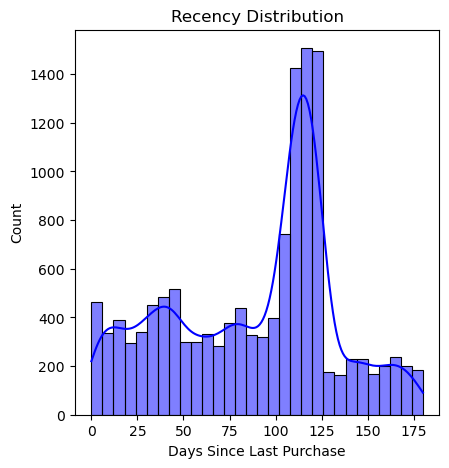

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_data['Recency'], kde=True, bins=30, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

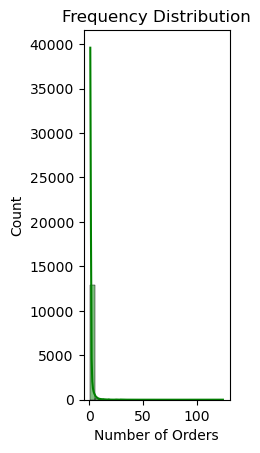

In [44]:
plt.subplot(1, 3, 2)
sns.histplot(rfm_data['Frequency'], kde=True, bins=30, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Count')

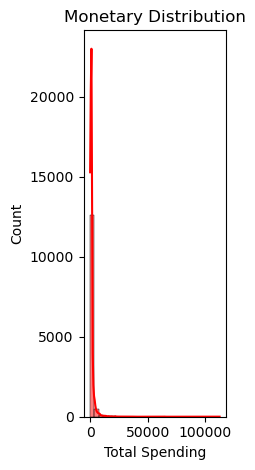

In [45]:
plt.subplot(1, 3, 3)
sns.histplot(rfm_data['Monetary'], kde=True, bins=30, color='red')
plt.title('Monetary Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [46]:
data['created_date'] = pd.to_datetime(data['created_date'])
completed_orders = data[data['order_status'] == 'COMPLETED']
reference_date = completed_orders['created_date'].max()

rfm = completed_orders.groupby('user_id').agg({
    'created_date': lambda x: (reference_date - x.max()).days,  # Recency
    'order_num': 'count',
    'nettotalprice': 'sum'
}).reset_index()

rfm.columns = ['user_id', 'recency', 'frequency', 'monetary_value']
purchase_threshold = 30
rfm['will_purchase'] = (rfm['recency'] <= purchase_threshold).astype(int)
regression_features = rfm[['recency', 'frequency', 'monetary_value']]
regression_target = rfm['monetary_value']

classification_features = rfm[['recency', 'frequency', 'monetary_value']]
classification_target = rfm['will_purchase']

from sklearn.model_selection import train_test_split
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    classification_features, classification_target, test_size=0.3, random_state=42)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    regression_features, regression_target, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
logistic_model = LogisticRegression()
logistic_model.fit(X_class_train, y_class_train)
y_class_pred = logistic_model.predict(X_class_test)
classification_accuracy = accuracy_score(y_class_test, y_class_pred)

linear_model = LinearRegression()
linear_model.fit(X_reg_train, y_reg_train)
y_reg_pred = linear_model.predict(X_reg_test)
regression_rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))

print("Classification Model Accuracy:", classification_accuracy)
print("Regression Model RMSE:", regression_rmse)

Classification Model Accuracy: 1.0
Regression Model RMSE: 5.034799954719834e-13


In [47]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import pandas as pd

classification_probabilities = logistic_model.predict_proba(X_class_test)[:, 1]
predictions = pd.DataFrame({
    'user_id': rfm.loc[X_class_test.index, 'user_id'].values,
    'predicted_purchase_probability': classification_probabilities,
    'actual_purchase': y_class_test.values,
    'predicted_next_spend': linear_model.predict(X_reg_test)
})
next_purchase = predictions.loc[predictions['predicted_purchase_probability'].idxmax()]

print(f"""
The predicted customer that will purchase next is user_id '{next_purchase['user_id']}', and they are expected to spend approximately {next_purchase['predicted_next_spend']:.2f}.
""")


The predicted customer that will purchase next is user_id 'sambe', and they are expected to spend approximately 226.36.



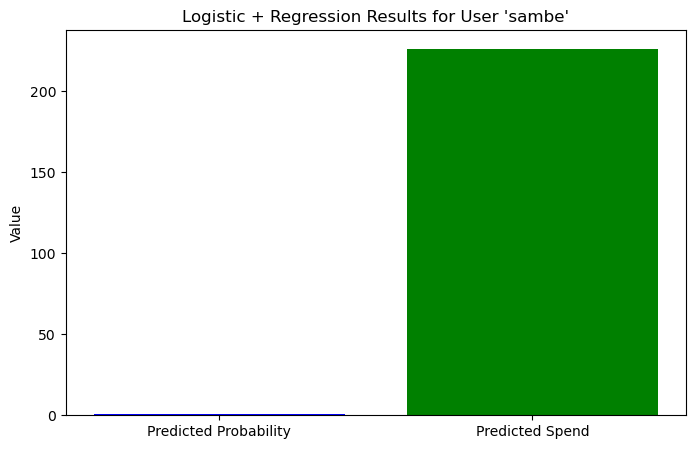


Logistic + Regression Method:
Customer 'sambe' has the highest probability of purchasing next, 
with a probability of 1.00.
Their expected spend for the next purchase is approximately 226.36.



In [48]:
predictions = pd.DataFrame({
    'user_id': rfm.loc[X_class_test.index, 'user_id'].values,
    'predicted_purchase_probability': classification_probabilities,
    'actual_purchase': y_class_test.values,
    'predicted_next_spend': linear_model.predict(X_reg_test)
})

next_purchase_logistic = predictions.loc[predictions['predicted_purchase_probability'].idxmax()]

plt.figure(figsize=(8, 5))
plt.bar(
    ['Predicted Probability', 'Predicted Spend'],
    [next_purchase_logistic['predicted_purchase_probability'], next_purchase_logistic['predicted_next_spend']],
    color=['blue', 'green']
)
plt.title(f"Logistic + Regression Results for User '{next_purchase_logistic['user_id']}'")
plt.ylabel('Value')
plt.show()

print(f"""
Logistic + Regression Method:
Customer '{next_purchase_logistic['user_id']}' has the highest probability of purchasing next, 
with a probability of {next_purchase_logistic['predicted_purchase_probability']:.2f}.
Their expected spend for the next purchase is approximately {next_purchase_logistic['predicted_next_spend']:.2f}.
""")

## Question 2

##### Python packages for calculating CLV:


Predictive Modeling
* scikit-learn - machine learning models such as classification and regression.
* lifetimes - Utilization in CLV that includes BG/ND models.

Retention Analysis
* cohorts: Application of retention rate calculations.

In [49]:
import pandas as pd
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions, plot_frequency_recency_matrix
from lifetimes.utils import summary_data_from_transaction_data
import matplotlib.pyplot as plt

In [50]:
data['created_date'] = pd.to_datetime(data['created_date'], errors='coerce')
completed_orders = data[data['order_status'] == 'COMPLETED']
summary = summary_data_from_transaction_data(
    completed_orders,
    customer_id_col='user_id',
    datetime_col='created_date',
    monetary_value_col='nettotalprice',
    observation_period_end=completed_orders['created_date'].max()
)
summary = summary[summary['monetary_value'] > 0]

In [51]:
bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    30, summary['frequency'], summary['recency'], summary['T']
)
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(summary['frequency'], summary['monetary_value'])
summary['expected_monetary_value'] = ggf.conditional_expected_average_profit(
    summary['frequency'], summary['monetary_value']
)
summary['predicted_revenue'] = summary['predicted_purchases'] * summary['expected_monetary_value']

In [52]:
summary['predicted_purchase_probability'] = bgf.conditional_probability_alive(
    summary['frequency'], summary['recency'], summary['T']
)
summary['predicted_next_purchase'] = ggf.conditional_expected_average_profit(
    summary['frequency'], summary['monetary_value']
)
next_purchase = summary.loc[summary['predicted_purchase_probability'].idxmax()]

print(f"""
The predicted customer that will purchase next is user_id '{next_purchase.name}', and they are expected to spend approximately {next_purchase['predicted_next_purchase']:.2f}.
""")


The predicted customer that will purchase next is user_id 'andre', and they are expected to spend approximately 1420.08.



         predicted_purchases  expected_monetary_value  predicted_revenue
user_id                                                                 
danie              10.539830              1456.362824       15349.817164
david              10.541406              1345.672318       14185.277883
chris               8.832783              1571.428732       13880.089733
andre               9.026006              1420.078728       12817.639471
micha               8.102510              1110.283710        8996.084894


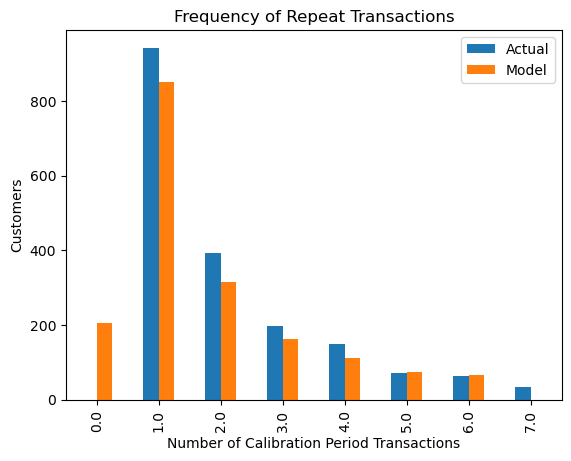

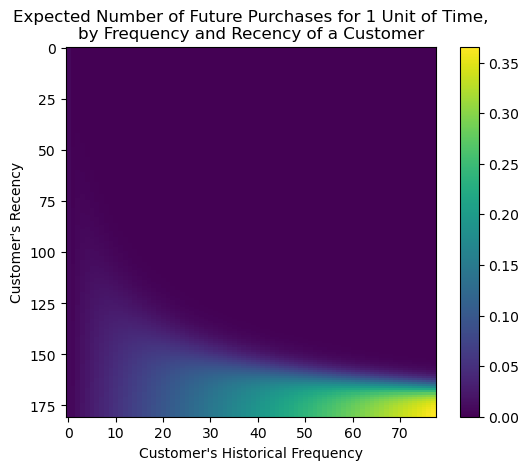

In [53]:
top_customers = summary[['predicted_purchases', 'expected_monetary_value', 'predicted_revenue']].sort_values(
    by='predicted_revenue', ascending=False
)

print(top_customers.head())

plot_period_transactions(bgf)
plt.show()

plot_frequency_recency_matrix(bgf)
plt.show()

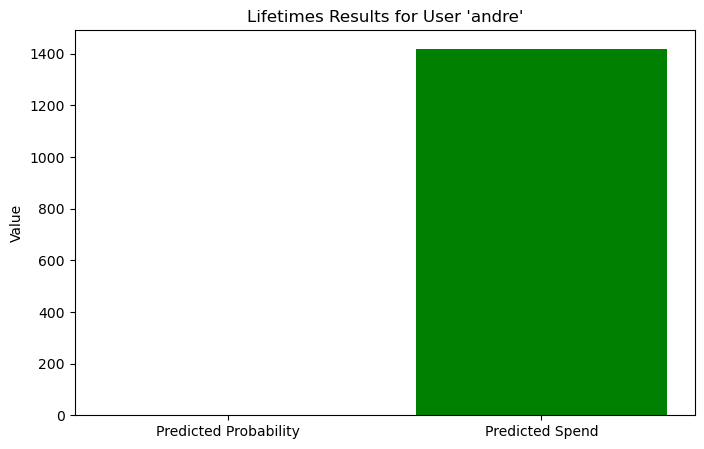


Lifetimes Method:
Customer 'andre' has the highest probability of purchasing next, 
with a probability of 0.99.
Their expected spend for the next purchase is approximately 1420.08.



In [54]:
summary['predicted_purchase_probability'] = bgf.conditional_probability_alive(
    summary['frequency'], summary['recency'], summary['T']
)

summary['predicted_next_purchase'] = ggf.conditional_expected_average_profit(
    summary['frequency'], summary['monetary_value']
)

next_purchase_lifetimes = summary.loc[summary['predicted_purchase_probability'].idxmax()]

plt.figure(figsize=(8, 5))
plt.bar(
    ['Predicted Probability', 'Predicted Spend'],
    [next_purchase_lifetimes['predicted_purchase_probability'], next_purchase_lifetimes['predicted_next_purchase']],
    color=['blue', 'green']
)
plt.title(f"Lifetimes Results for User '{next_purchase_lifetimes.name}'")
plt.ylabel('Value')
plt.show()

# Print summary
print(f"""
Lifetimes Method:
Customer '{next_purchase_lifetimes.name}' has the highest probability of purchasing next, 
with a probability of {next_purchase_lifetimes['predicted_purchase_probability']:.2f}.
Their expected spend for the next purchase is approximately {next_purchase_lifetimes['predicted_next_purchase']:.2f}.
""")

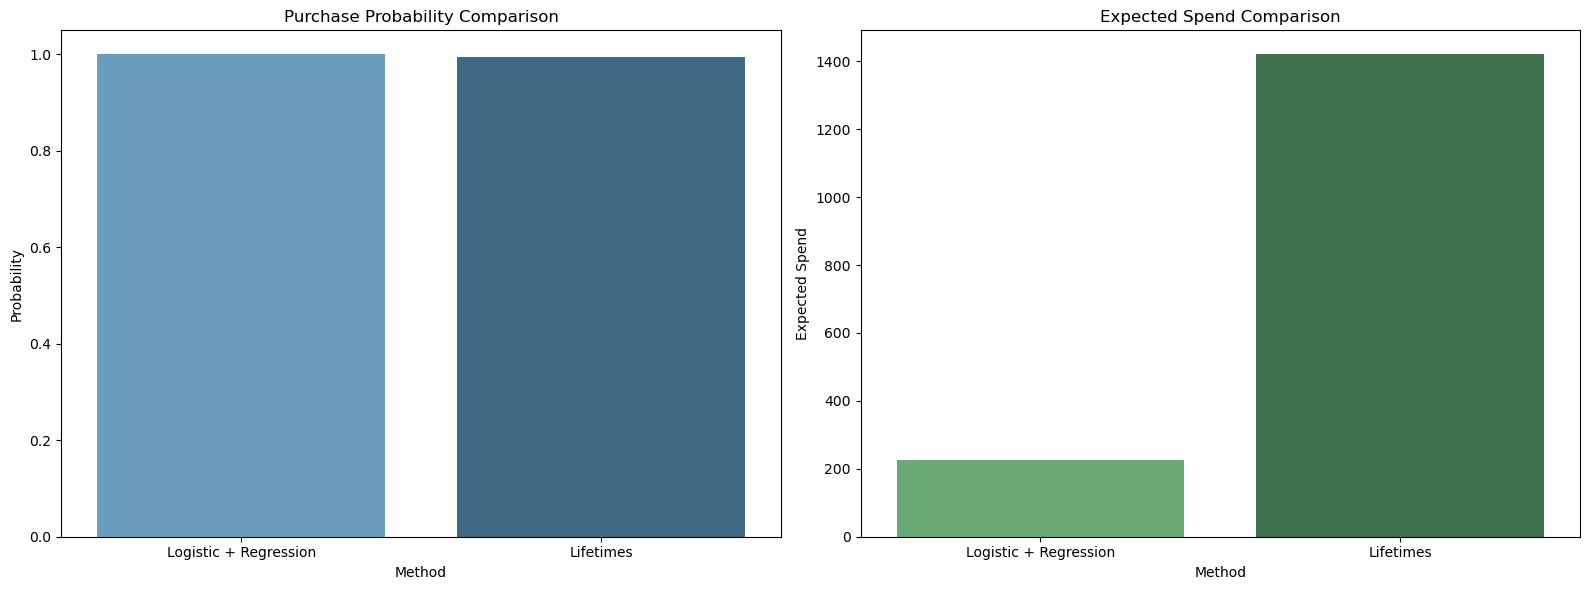

In [55]:
comparison_df = pd.DataFrame({
    'Method': ['Logistic + Regression', 'Lifetimes'],
    'Customer ID': [next_purchase_logistic['user_id'], next_purchase_lifetimes.name],
    'Probability of Purchase': [
        next_purchase_logistic['predicted_purchase_probability'], 
        next_purchase_lifetimes['predicted_purchase_probability']
    ],
    'Expected Spend': [
        next_purchase_logistic['predicted_next_spend'], 
        next_purchase_lifetimes['predicted_next_purchase']
    ]
})

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    data=comparison_df,
    x='Method',
    y='Probability of Purchase',
    palette='Blues_d',
    ax=ax[0]
)
ax[0].set_title('Purchase Probability Comparison')
ax[0].set_ylabel('Probability')
ax[0].set_xlabel('Method')

sns.barplot(
    data=comparison_df,
    x='Method',
    y='Expected Spend',
    palette='Greens_d',
    ax=ax[1]
)
ax[1].set_title('Expected Spend Comparison')
ax[1].set_ylabel('Expected Spend')
ax[1].set_xlabel('Method')

plt.tight_layout()
plt.show()